In [1]:
import csv

In [2]:
f = open('temp_ice.csv', encoding = 'euc-kr')

In [3]:
data = csv.reader(f)

In [4]:
header = next(data)

In [5]:
temp = []

In [6]:
ice = []

In [7]:
# 전체 데이터를 행별로 temp 리스트, ice 리스트에 저장 및 출력하기
for row in data:
    temp.append(float(row[1]))  # 행별로 평균 기온 데이터 저장하기
    ice.append(int(row[4]))  # 행별로 아이스크림 쇼핑 클릭량 데이터 저장하기

In [8]:
# 평균 기온 값을 기준으로 도수분포 구간 설정하기
import numpy as np

In [9]:
bins = np.arange(min(temp), max(temp)+5, 5)

In [10]:
hist, bins = np.histogram(temp, bins)

In [11]:
# 평균 기온 값을 기준으로 아이스크림 쇼핑 클릭량을 구분하여 저장하기
ice_buy = np.zeros(7)

In [12]:
for i in range(0, len(temp)):  # 평균 기온 데이터 전체 탐색하기
    if bins[0] <= temp[i] and temp[i] < bins[1]:  # 첫 번째 계급에 해당한다면
        ice_buy[0] = ice_buy[0] + ice[i]
    elif bins[1] <= temp[i] and temp[i] < bins[2]:
        ice_buy[1] = ice_buy[1] + ice[i]
    elif bins[2] <= temp[i] and temp[i] < bins[3]:
        ice_buy[2] = ice_buy[2] + ice[i]
    elif bins[3] <= temp[i] and temp[i] < bins[4]:
        ice_buy[3] = ice_buy[3] + ice[i]
    elif bins[4] <= temp[i] and temp[i] < bins[5]:
        ice_buy[4] = ice_buy[4] + ice[i]
    elif bins[5] <= temp[i] and temp[i] < bins[6]:
        ice_buy[5] = ice_buy[5] + ice[i]
    else:
        ice_buy[6] = ice_buy[6] + ice[i]

In [13]:
# 평균 기온 값 계급별 아이스크림 쇼핑 클릭량의 평균 구하기
ice_buy_a = np.zeros(7)

In [14]:
for i in range(0, len(ice_buy)):
    ice_buy_a[i] = ice_buy[i] / hist[i]

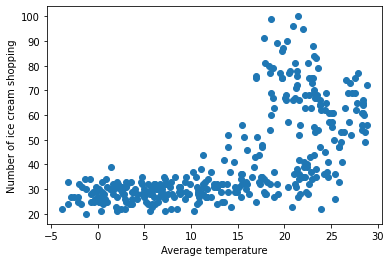

In [15]:
# 평균 기온 값 계급별 아이스크림 쇼핑 클릭량의 평균을 막대그래프로 나타내기
import matplotlib.pyplot as plt
plt.xlabel('Average temperature')
plt.ylabel('Number of ice cream shopping')
# 분산형 그래프
plt.scatter(temp, ice)
plt.show()